In [1]:
from neuron import h, gui
from neuron.units import ms, mV

#from bokeh.io import output_notebook
#import bokeh.plotting as plt
#output_notebook()

import numpy as np
import pprint
pp = pprint.PrettyPrinter(indent=1)

from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

import os
#import time
#start = time.time()
#run a function here
#end = time.time()
#print(end - start)

#import cProfile
##cProfile.run('func_name(var1, var2)')

In [23]:
from src import helper_functions as hf
from src import data_io as io
from src import config as cfg
from src import computation as comp
from src import plotting as plot

In [24]:
%matplotlib inline

%load_ext autoreload
%autoreload 2



The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [25]:

morph_ses_path = "/Users/Gregg/code/adult-spine-models/scripts/demo_data/asc26py3.ses"

h.load_file(morph_ses_path)

soma = h.soma
#soma = h.Section(name='soma')
soma.nseg = 3
soma.diam = 10
soma.L = 10
h.soma.insert('hh')

for sec in h.allsec():
    if 'soma' in sec.name():
        sec.insert('hh')
    else:
        #sec.insert('hh')
        sec.insert('pas')
        #sec.nseg = int(sec.L)*10  Doing this later so that the topology still prints cleanly

h.topology()
        
for sec in h.allsec():
    if 'soma' in sec.name():
        pass
    else:
        nsegs_to_add_to_this_section = int(sec.L*cfg.nseg_density)
        if not(nsegs_to_add_to_this_section % 2):
            nsegs_to_add_to_this_section += 1   # need to make sure this parameter is odd
        sec.nseg = nsegs_to_add_to_this_section


|---|       soma(0-1)
   `------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|       dend[0](0-1)
                                                                                                                                                                            

In [5]:
h.soma.psection()

{'point_processes': {},
 'density_mechs': {'hh': {'gnabar': [0.12, 0.12, 0.12],
   'gkbar': [0.036, 0.036, 0.036],
   'gl': [0.0003, 0.0003, 0.0003],
   'el': [-54.3, -54.3, -54.3],
   'gna': [0.0, 0.0, 0.0],
   'gk': [0.0, 0.0, 0.0],
   'il': [0.0, 0.0, 0.0],
   'minf': [0.0, 0.0, 0.0],
   'hinf': [0.0, 0.0, 0.0],
   'ninf': [0.0, 0.0, 0.0],
   'mtau': [0.0, 0.0, 0.0],
   'htau': [0.0, 0.0, 0.0],
   'ntau': [0.0, 0.0, 0.0],
   'm': [0.0, 0.0, 0.0],
   'h': [0.0, 0.0, 0.0],
   'n': [0.0, 0.0, 0.0]}},
 'ions': {'na': {'ena': [50.0, 50.0, 50.0],
   'nai': [10.0, 10.0, 10.0],
   'nao': [140.0, 140.0, 140.0],
   'ina': [0.0, 0.0, 0.0],
   'dina_dv_': [0.0, 0.0, 0.0]},
  'k': {'ek': [-77.0, -77.0, -77.0],
   'ki': [54.4, 54.4, 54.4],
   'ko': [2.5, 2.5, 2.5],
   'ik': [0.0, 0.0, 0.0],
   'dik_dv_': [0.0, 0.0, 0.0]}},
 'morphology': {'L': 10.0,
  'diam': [10.0, 10.0, 10.0],
  'pts3d': [(392.2510070800781, -119.01000213623047, -207.0, 10.0),
   (392.2510070800781, -119.01000213623047, -207.59

In [6]:
h.topology()




|---|       soma(0-1)
   `--------------------------------------|       dend[0](0-1)
                                           `----------------------------------|       dend[1](0-1)
                                           `----------------------------------|       dend[2](0-1)
   `------------------|       dend[3](0-1)
                       `--------------------------------------|       dend[4](0-1)
                       `------------------------------------|       dend[5](0-1)
   `------------------------------------------------------------------------------------------------------------|       dend[6](0-1)
   `--------------|       dend[7](0-1)
                   `------------|       dend[8](0-1)
                   `--------------------------------------------------------------------------------------------------------------------------------|       dend[9](0-1)
   `------------------------------|       apic[0](0-1)
                                   `------------------------

1.0

In [8]:

#h.apic[0].connect(soma(1)) #synax is child.connect(parent, end)
attach_tuples = [
    (h.apic[0], 1),
    (h.dend[3], 0.5),
    (h.dend[6], 0.5),
    (h.dend[7], 0.5),
    (h.dend[0], 0.5),
    ]

for (section, location) in attach_tuples:
#    section.connect(soma(location))
    #section.disconnect()
    pass

#Add AIS
ais = h.Section(name='ais')
ais.connect(soma(0))

ais.nseg = 3
ais.diam = 1
ais.L = 20
ais.insert('hh')
print(ais.parentseg())

soma(0)


In [9]:
iclamp = h.IClamp(soma(1))


In [10]:
#check that pas is in the dendrites and not the soma
pp.pprint(ais.psection())
pp.pprint(h.dend[0].psection())
pp.pprint(soma.psection())

{'Ra': 35.4,
 'cell': None,
 'cm': [1.0, 1.0, 1.0],
 'density_mechs': {'hh': {'el': [-54.3, -54.3, -54.3],
                          'gk': [0.0, 0.0, 0.0],
                          'gkbar': [0.036, 0.036, 0.036],
                          'gl': [0.0003, 0.0003, 0.0003],
                          'gna': [0.0, 0.0, 0.0],
                          'gnabar': [0.12, 0.12, 0.12],
                          'h': [0.0, 0.0, 0.0],
                          'hinf': [0.0, 0.0, 0.0],
                          'htau': [0.0, 0.0, 0.0],
                          'il': [0.0, 0.0, 0.0],
                          'm': [0.0, 0.0, 0.0],
                          'minf': [0.0, 0.0, 0.0],
                          'mtau': [0.0, 0.0, 0.0],
                          'n': [0.0, 0.0, 0.0],
                          'ninf': [0.0, 0.0, 0.0],
                          'ntau': [0.0, 0.0, 0.0]}},
 'hoc_internal_name': '__nrnsec_0x7fe2e6e19ea0',
 'ions': {'k': {'dik_dv_': [0.0, 0.0, 0.0],
                'ek': [-77.0

In [11]:
#doing this after ^^ so the dendrite p.section{} is more preintable
for sec in h.allsec():
    if 'soma' in sec.name():
        pass
    else:
        nsegs_to_add_to_this_section = int(sec.L*cfg.nseg_density)
        if not(nsegs_to_add_to_this_section % 2):
            nsegs_to_add_to_this_section += 1   # need to make sure this parameter is odd
        sec.nseg = 3#nsegs_to_add_to_this_section

In [12]:
#Time varying current stimuli can be simulated by setting delay=0, 
#dur=1e9 and playing a vector into amp with the play() Vector method.
iclamp.delay = 0# * ms#0
iclamp.dur = 1e9
#iclamp.amp = 0.9 #play???

vector_source_I = h.Vector([0, 0, 0.9,0,.9,0,.9,0,.9])*3
tvec = h.Vector([0,200,302,304,310,312,320,322,330])

out = vector_source_I.play(iclamp._ref_amp, tvec, False)### nothing here seems to work.... needed _ref_amp!!! tell them to update the docs?


In [13]:
v = h.Vector().record(soma(0.5)._ref_v)             # Membrane potential vector
t = h.Vector().record(h._ref_t)                     # Time stamp vector
#h.load_file('stdrun.hoc')
h.finitialize(-70 * mV)
h.continuerun(350 * ms)

0.0

In [14]:
print(iclamp.amp)

2.7


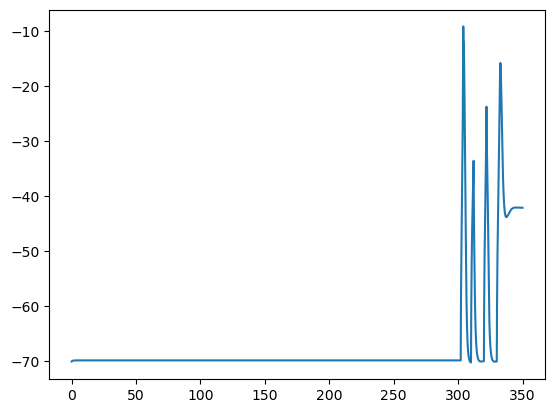

In [15]:
plt.plot(np.array(t), np.array(v))

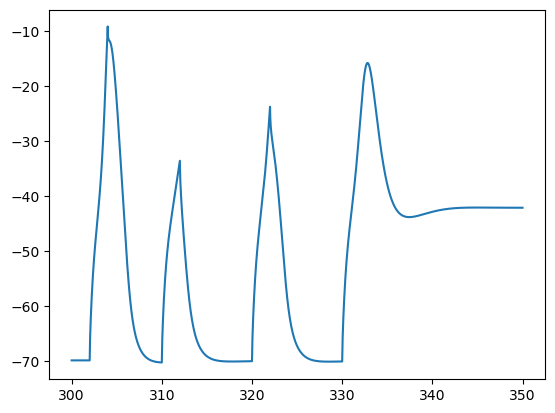

In [16]:
#plt.figure(x_axis_label='t (ms)', y_axis_label='v (mV)')
plt.plot(np.array(t)[12000:], np.array(v)[12000:])


In [17]:

spines_path = "/Users/Gregg/code/Adult-Spine-Models/scripts/demo_data/ASC26_cell_3_spines.mat"
print(os.path.exists(spines_path))
spine_data = io.loadmat(spines_path)

shifts_by_fov = [
    np.array([11,-5,0]),
    np.array([-0,-.5,0]),
    np.array([8,1,0]),
    np.array([-4,8,0]),
    np.array([0,0,0]),
    np.array([0,0,0]),
    np.array([0,0,0]),
    np.array([0,0,0]),
    np.array([0,0,0]),
    np.array([0,0,0]),
    np.array([-5,4,0.1]),
]

True


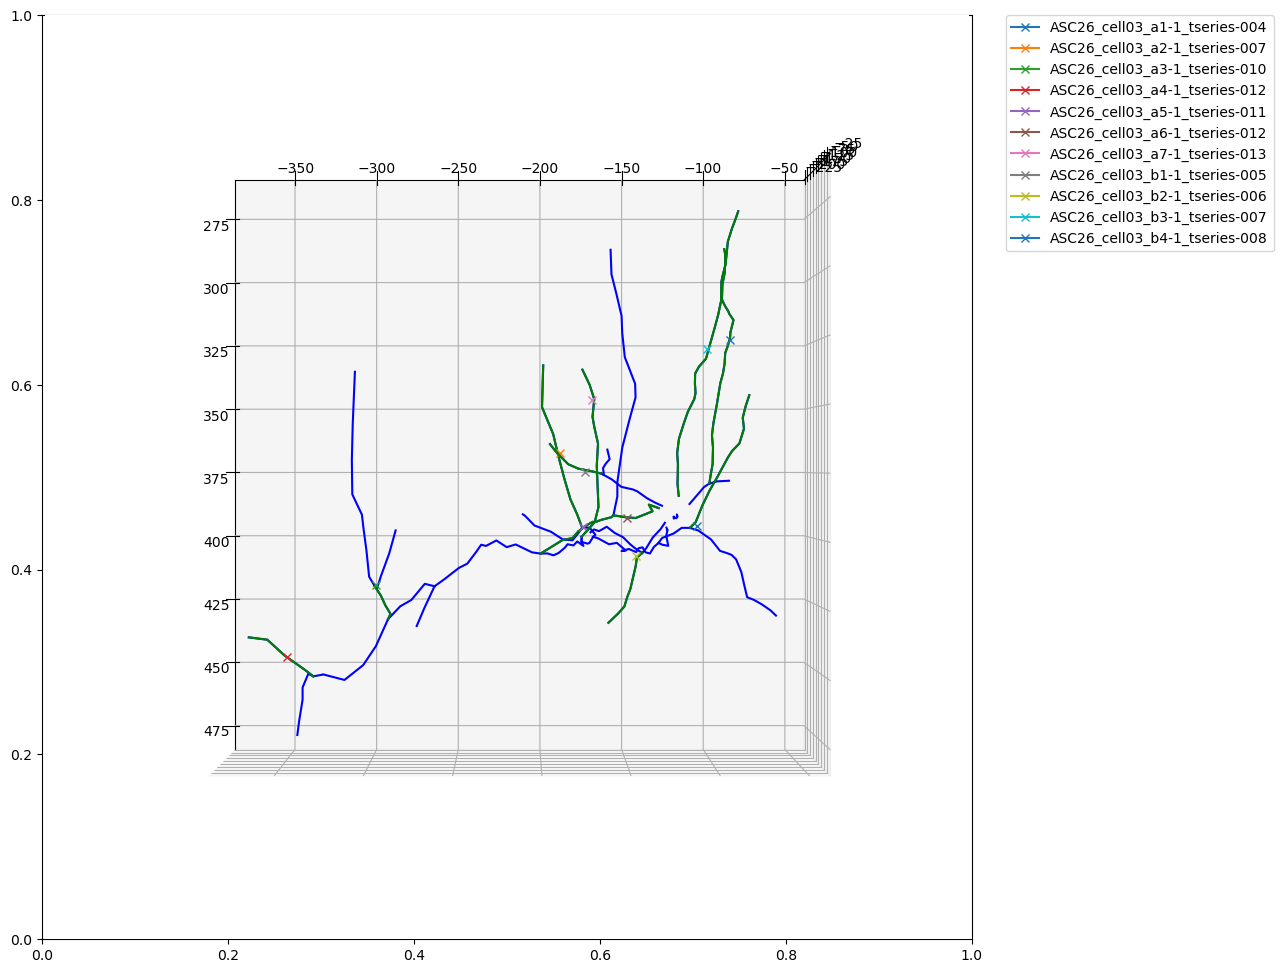

In [18]:


plot.fovs_on_morphology(h, spine_data)

    

Cumulative distance for manual shift: 63.347328734841284
Searching within these sections [dend[9]]
Cumulative distance for inferred shift: 58.22902889652862


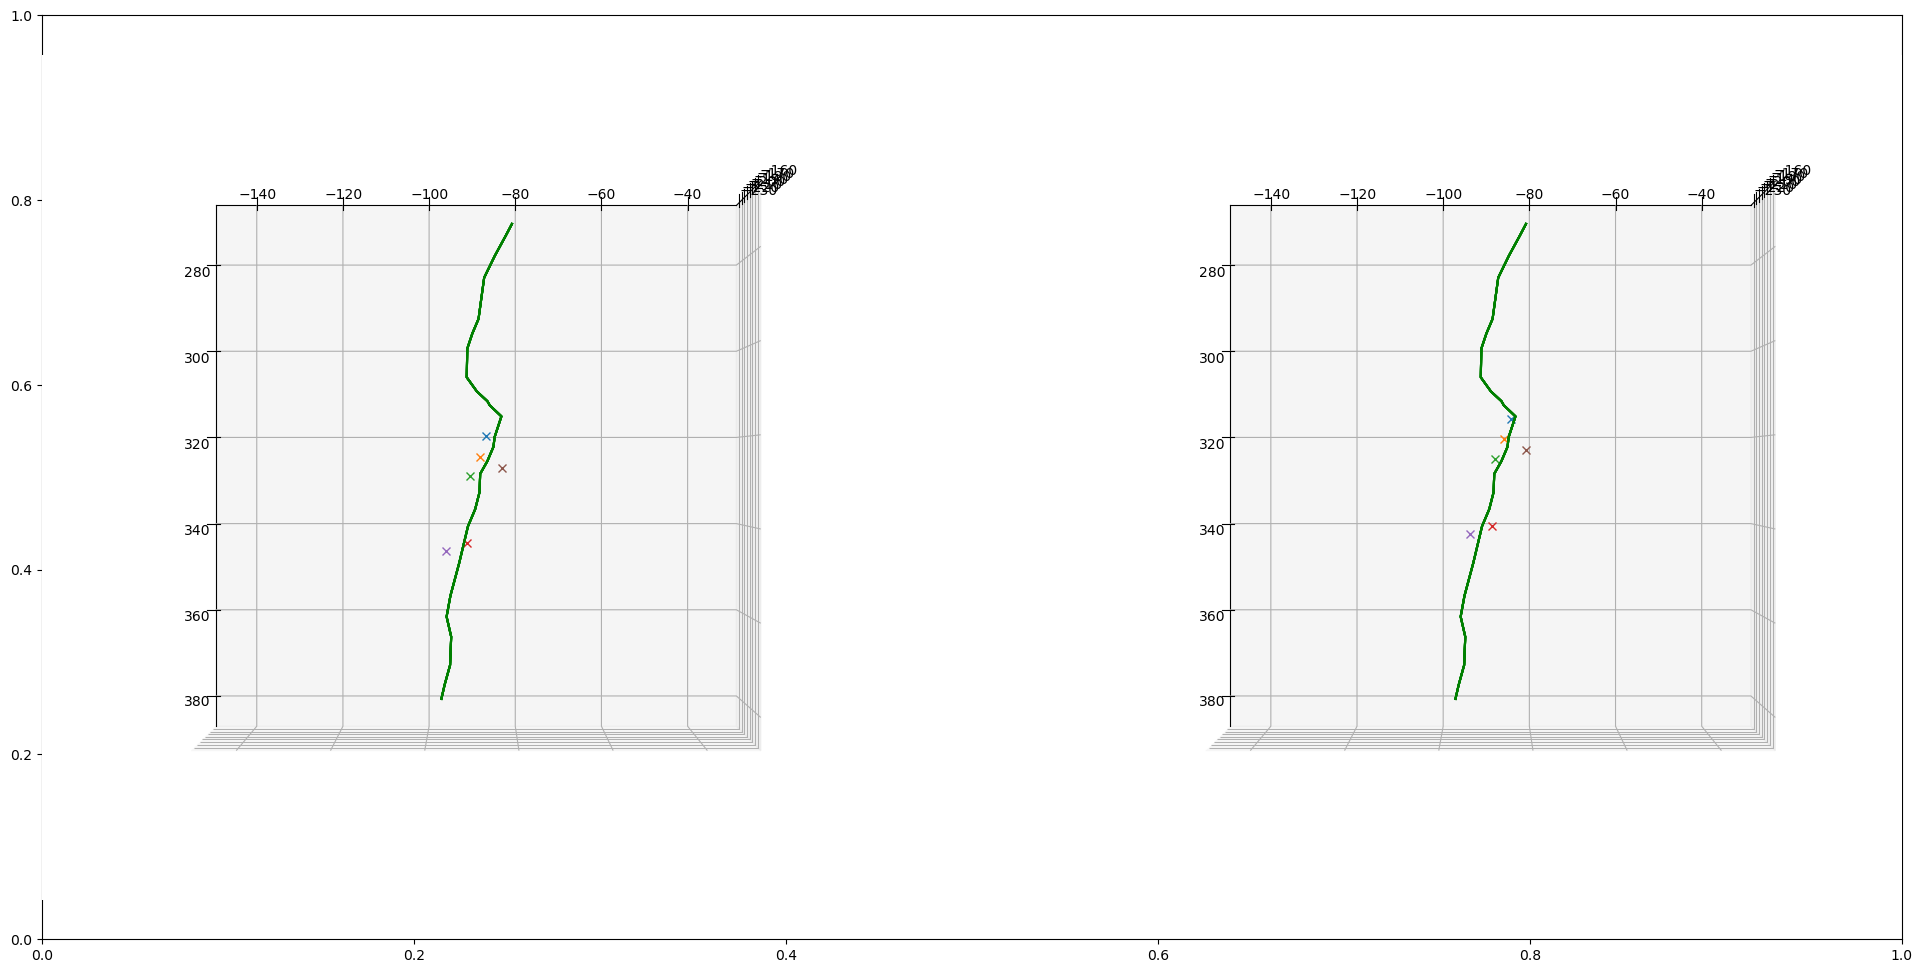

In [19]:
#Plot the center of the spine ROIs around the mofphology for a given fov number

#11 FOVs for ASC26 cell 3 - max fov_num=10
fov_num = 10

shifts_by_fov = [
    np.array([11,-5,0]),
    np.array([-0,-.5,0]),
    np.array([8,1,0]),
    np.array([-4,8,0]),
    np.array([0,0,0]),
    np.array([0,0,0]),
    np.array([0,0,0]),
    np.array([0,0,0]),
    np.array([0,0,0]),
    np.array([0,0,0]),
    np.array([-5,4,0.1]),
]

selected_manual_shift = shifts_by_fov[fov_num]
total_dist = comp.find_distance_for_shift_slow(h, spine_data, fov_num, selected_manual_shift, verbose=False)    
print(f'Cumulative distance for manual shift: {total_dist}')


optimal_shift = comp.estimate_offset(h, spine_data, fov_num, max_shift=15, iterations=2, verbose=False)
total_dist = comp.find_distance_for_shift_slow(h, spine_data, fov_num, optimal_shift, verbose=False)    
print(f'Cumulative distance for inferred shift: {total_dist}')

#plot.spine_centers_on_morphology(h, spine_data, fov_num, manual_adjstment = optimal_shift, ax=None)
plot.manual_and_auto_shift(h, spine_data, fov_num, selected_manual_shift, optimal_shift)


In [29]:
#use this block to save the more accurate distance to soma and branch order information 

stat_dict = comp.get_branch_order_and_dist(h, spine_data, shifts_by_fov)
io.save_named_iterable_to_json(asc26_cell1_manual_name=stat_dict)


ASC26_cell03_a1-1_tseries-004
using manual shift
order: 3, dist: 64.95333056621165
order: 3, dist: 59.19353787437933
order: 3, dist: 58.74346886926624
order: 2, dist: 55.14193852505382
order: 2, dist: 41.22549291170141
order: 2, dist: 41.72621604909626
order: 2, dist: 43.628489134280024
order: 2, dist: 43.92884804246693
order: 2, dist: 43.92884804246693
order: 2, dist: 43.728608770342326
order: 2, dist: 44.579456422833104
order: 3, dist: 75.69606806185922
order: 3, dist: 76.54619840485061
order: 2, dist: 47.43282836513917
ASC26_cell03_a2-1_tseries-007
using manual shift
order: 4, dist: 184.21253217386985
order: 4, dist: 182.46214227712838
order: 4, dist: 179.5614961625282
order: 4, dist: 176.7608723277418
order: 4, dist: 172.159847456307
order: 4, dist: 169.4092347614275
order: 4, dist: 168.80910108254471
order: 4, dist: 166.35855522710662
order: 4, dist: 165.30832128906172
order: 4, dist: 163.75797595194783
order: 4, dist: 158.05670600256124
order: 4, dist: 153.40566999121955
ASC26_ce

In [9]:
frame_start = 35
frame_end = 55
t_simulation = (frame_end - frame_start)*cfg.ms_per_frame

def generate_ts_from_ftrace(ftrace):
    num_frames = len(ftrace)
    frame_times = np.arange(0, cfg.ms_per_frame*num_frames, cfg.ms_per_frame)
    return frame_times



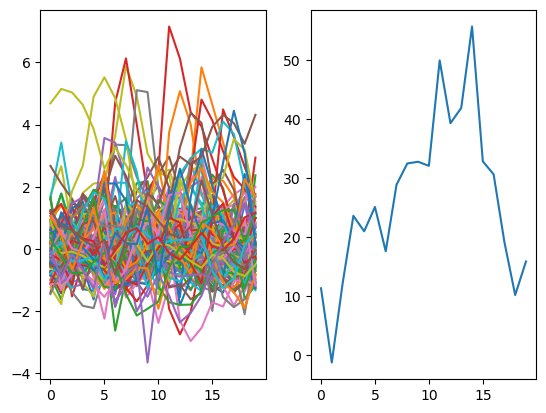

In [10]:
#Now lets play in some stims!!!

stim = 7
trial = 5

fig, axs = plt.subplots(1,2)


ex_spine_trace = hf.get_example_traces(spine_data)
summed_spine_traces = np.zeros(ex_spine_trace.shape)
for fov in spine_data['dend_cell'][2,:]:
    #ref = spine_data['dend_cell'][2,fov]
    fov_field_2 = spine_data[fov]#['DSI']
    spine_count = fov_field_2['trial_traces'].shape[-1]
    for i in range(spine_count):
        this_spine_traces = hf.get_traces(spine_data, fov=fov, spine_index=i)
        summed_spine_traces+=this_spine_traces
        axs[0].plot(this_spine_traces[stim, trial,:][frame_start:frame_end] )

axs[1].plot(summed_spine_traces[stim, trial,:][frame_start:frame_end])


In [11]:
pp.pprint(current_input_dict)
pp.pprint(current_input_dict[0].keys())

NameError: name 'current_input_dict' is not defined

In [12]:

#loop through all the spines and generate the current sources... we don't want to do this more than once. 


#so how do we select a current source? where should we put them?
#something with the same structure as what we are looping through
#so dictionary with FOV idx in first layer and spine idx in second layer?
#should we use names? at some point if we got them all in the right order we could just loop through directly. 

current_input_dict= comp.create_current_sources(h, spine_data, shifts_by_fov)


using manual shift
using manual shift
using manual shift
using manual shift
using inferred shift
Searching within these sections [apic[16], apic[7]]
using inferred shift
Searching within these sections [apic[16], apic[17]]
using inferred shift
Searching within these sections [apic[5]]
using inferred shift
Searching within these sections [dend[1]]
using inferred shift
Searching within these sections [dend[0], dend[4], dend[3], soma]
using inferred shift
Searching within these sections [dend[6]]
using manual shift


In [221]:
#then loop through again and set all the current sources to play their inputs



for fov_num, fov in enumerate(spine_data['dend_cell'][2,:]):
    #ref = spine_data['dend_cell'][2,fov]
    fov_field_2 = spine_data[fov]#['DSI']
    spine_count = fov_field_2['trial_traces'].shape[-1]
    
    fov_xyz = hf.get_xyz_coords_of_fov(spine_data, fov_num)
    nearest_section, sec_coords, min_dist = hf.find_closest_section(h, fov_xyz)
    order, dist, dist_from_branch = comp.compute_branch_order_and_dist(nearest_section, fov_xyz)    
    
    for i in range(spine_count):             
        iclamp = current_input_dict[fov_num][i]
        this_spine_traces = hf.get_traces(spine_data, fov=fov, spine_index=i)
        
        iclamp.delay = 0# * ms#0
        iclamp.dur = 1e9
        
        this_spine_trial_trace=this_spine_traces[stim, trial,:][frame_start:frame_end]#+2
        
        
        #play the same dummy EPESP to all of them
        #this_spine_trial_trace = summed_spine_traces[stim, trial,:][frame_start:frame_end]
        #print(this_spine_trial_trace.shape)
        
        #need to normalize
        this_spine_trial_trace = this_spine_trial_trace/(10*max(this_spine_trial_trace))
        
        #accont for the distance - linear way here (max dist is ~350)
        this_spine_trial_trace = this_spine_trial_trace*(dist**2)/1600 
        this_spine_trial_trace = np.zeros(this_spine_trial_trace.shape)
        #this_spine_trial_trace[this_spine_trial_trace<0] = 0
        
        
        
        
        frame_times = generate_ts_from_ftrace(this_spine_trial_trace)
        
        vector_source_I = h.Vector(this_spine_trial_trace)

        tvec = h.Vector(frame_times)
    
        out = vector_source_I.play(iclamp._ref_amp, tvec, True)##
        
        #pp.pprint(nearest_section.psection()['point_processes'])
        #raise


In [295]:
iclamp = h.IClamp(soma(1))

iclamp.delay = 0# * ms#0
iclamp.dur = 1e9
        
this_spine_trial_trace = summed_spine_traces[stim, trial,:][frame_start:frame_end]
print(this_spine_trial_trace.shape)
this_spine_trial_trace = this_spine_trial_trace/(10*max(this_spine_trial_trace))
frame_times = generate_ts_from_ftrace(this_spine_trial_trace)

vector_source_I = h.Vector(this_spine_trial_trace)
print(np.array(vector_source_I))

tvec = h.Vector(frame_times)
print(np.array(tvec))


out = vector_source_I.play(iclamp._ref_amp, tvec, True)##



/Users/Gregg/anaconda/envs/adult_spine_models/lib/python3.10/site-packages/PIL/Image.py:125: RuntimeWarning: The _imaging extension was built for another version of Pillow or PIL:
Core version: 9.3.0
Pillow version: 9.5.0
  warnings.warn(str(v), RuntimeWarning)
[autoreload of PIL.Image failed: Traceback (most recent call last):
  File "/Users/Gregg/anaconda/envs/adult_spine_models/lib/python3.10/site-packages/IPython/extensions/autoreload.py", line 261, in check
    superreload(m, reload, self.old_objects)
  File "/Users/Gregg/anaconda/envs/adult_spine_models/lib/python3.10/site-packages/IPython/extensions/autoreload.py", line 459, in superreload
    module = reload(module)
  File "/Users/Gregg/anaconda/envs/adult_spine_models/lib/python3.10/importlib/__init__.py", line 169, in reload
    _bootstrap._exec(spec, module)
  File "<frozen importlib._bootstrap>", line 619, in _exec
  File "<frozen importlib._bootstrap_external>", line 883, in exec_module
  File "<frozen importlib._bootstrap

(20,)
[ 0.02041405 -0.00214066  0.0218316   0.04243135  0.0377462   0.04513147
  0.03164865  0.05189925  0.05836343  0.05887592  0.05764013  0.08968757
  0.07059127  0.07525064  0.1         0.05899859  0.05505962  0.03447771
  0.01835944  0.02856347]
[   0.  100.  200.  300.  400.  500.  600.  700.  800.  900. 1000. 1100.
 1200. 1300. 1400. 1500. 1600. 1700. 1800. 1900.]


In [222]:
pp.pprint(h.apic[16].psection()['point_processes'])
pp.pprint(soma.psection()['point_processes'])



{'IClamp': {IClamp[368],
            IClamp[369],
            IClamp[363],
            IClamp[364],
            IClamp[362],
            IClamp[365],
            IClamp[367],
            IClamp[366],
            IClamp[370]}}
{}


In [223]:
v = h.Vector().record(soma(0.5)._ref_v)             # Membrane potential vector
t = h.Vector().record(h._ref_t)                     # Time stamp vector
#h.load_file('stdrun.hoc')
h.finitialize(-70 * mV)
h.continuerun(t_simulation * ms) #eventually run it for 10000


0.0

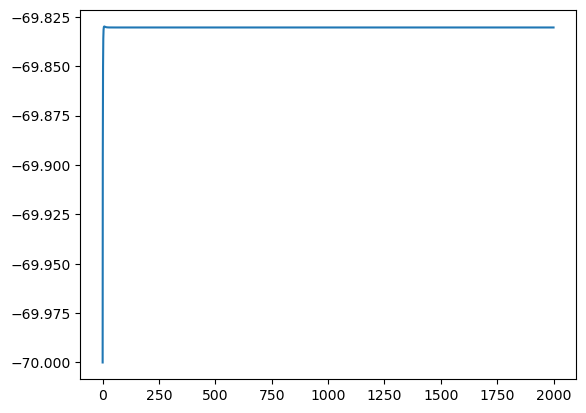

In [224]:
#then plot
fig, ax = plt.subplots()
ax.plot(np.array(t), np.array(v))



#f = plt.figure(x_axis_label='t (ms)', y_axis_label='v (mV)')
#f.line(np.array(t), np.array(v), line_width=2)
#plt.show(f)